In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from sklearn import preprocessing
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
import sklearn
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import time
import math
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, f1_score,recall_score
from math import *
from decimal import Decimal 
import scipy.spatial.distance as dist

# **Load Data**

In [ ]:

 
#bcw_dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DM project/breast-cancer-wisconsin.data") 
#wbc_csv=pd.read_csv("/content/drive/My Drive/Colab Notebooks/DM project/breast-cancer-dataset - breast-cancer-dataset.csv")
#wbc_csv=wbc_csv.replace(to_replace =["?"], value =0)
#wbc_csv=wbc_csv.drop([wbc_csv.columns[0]],axis=1)
#wbc_csv=wbc_csv.to_csv("/content/drive/My Drive/Colab Notebooks/DM project/breast-cancer-dataset - breast-cancer-dataset.csv")
wbc_csv=pd.read_csv("/content/drive/My Drive/Colab Notebooks/DM project/breast-cancer-dataset - breast-cancer-dataset.csv")
wbc_csv=wbc_csv.drop([wbc_csv.columns[0]],axis=1)
wbc_csv= pd.DataFrame(wbc_csv)
label_wbc=wbc_csv['label']
features_wbc=wbc_csv.drop(['label'],axis=1)

label_wbc.head()


0    2
1    2
2    2
3    2
4    2
Name: label, dtype: int64

**Uploading wisconsin dataset**


In [ ]:
#wdbc_dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DM project/wdbc.data") 
wdbc_csv = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DM project/data.csv")
wdbc_csv= pd.DataFrame(wdbc_csv)
label_wdbc=wdbc_csv['diagnosis']
features_wdbc=wdbc_csv.drop(['diagnosis'],axis=1)
features_wdbc=features_wdbc.drop([features_wdbc.columns[31]],axis=1)
wdbc_csv.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **PreProcessing**

**Preprocessing:Wisconsin breast cancer (WBC)**

In [ ]:
#features_wbc=features_wbc.replace(to_replace =["?"], value =0) 
#features_wbc.to_excel("/content/drive/My Drive/Colab Notebooks/DM project/breast-cancer-dataset.xlsx")
#features_wbc = pd.read_excel(open('/content/drive/My Drive/Colab Notebooks/DM project/breast-cancer-dataset.xlsx', 'rb'))  # doctest: +SKIP
#features_wbc.to_csv( '/content/drive/My Drive/Colab Notebooks/DM project/breast-cancer-dataset.csv')
#features_wbc=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DM project/breastcancerdataset_features.csv')
#features_wbc=features_wbc.drop([features_wbc.columns[0],features_wbc.columns[1]],axis=1)
#features_wbc.head()


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
features_wbc_preproc = min_max_scaler.fit_transform(features_wbc)
features_wbc_preproc=pd.DataFrame(features_wbc_preproc)
features_wbc_preproc.head()

,0,1,2,3,4,5,6,7,8,9
0,0.070067,0.444444,0.000000,0.000000,0.000000,0.111111,0.1,0.222222,0.000000,0.0
1,0.070285,0.444444,0.333333,0.333333,0.444444,0.666667,1.0,0.222222,0.111111,0.0
2,0.071217,0.222222,0.000000,0.000000,0.000000,0.111111,0.2,0.222222,0.000000,0.0
3,0.071281,0.555556,0.777778,0.777778,0.000000,0.222222,0.4,0.222222,0.666667,0.0
4,0.071336,0.333333,0.000000,0.000000,0.222222,0.111111,0.1,0.222222,0.000000,0.0


In [ ]:
features_wbc_preproc=features_wbc_preproc.rename(columns={0: 'sample_code_number', 1: 'clump_thickness',2: 'uniformity_of_cell_size', 3: 'uniformity_of_cell_shape',4: 'marginal_adhesion', 5: 'single_epithelial_cell_size',6: 'bare_nuclei', 7: 'bland_chromatin',8: 'normal_nucleoli', 9: 'mitoses'})
features_wbc_preproc.head()
WOFS_features_wbc=features_wbc_preproc
#'sample_code_number','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses'
#  0                       1                   2                         3                         4                       5                             6                 7               8            9     

**preprocessing WDBC dataset**

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
features_wdbc_preproc = min_max_scaler.fit_transform(features_wdbc)
features_wdbc_preproc=pd.DataFrame(features_wdbc_preproc)
features_wdbc_preproc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
features_wdbc_preproc=features_wdbc_preproc.rename(columns={0: 'id', 1: 'radius_mean',2: 'texture_mean', 3: 'perimeter_mean',4: 'area_mean', 5: 'smoothness_mean',6: 'compactness_mean', 7: 'concavity_mean',8: 'concavepoints_mean', 9: 'symmetry_mean', 10: 'fractal_dimension_mean', 11: 'radius_se', 12: 'texture_se', 13: 'perimeter_se', 14: 'area_se', 15: 'smoothness_se', 16: 'compactness_se', 17: 'concavity_se', 18: 'concavepoints_se', 19: 'symmetry_se', 20: 'fractal_dimension_se', 21: 'radius_worst', 22: 'texture_worst', 23: 'perimeter_worst', 24: 'area_worst', 25: 'smoothness_worst', 26: 'compactness_worst', 27:'concavity_worst', 28: 'concavepoints_worst', 29: 'symmetry_worst', 30: 'fractal_dimension_worst'})
features_wdbc_preproc.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concavepoints_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
WOFS_features_wdbc=features_wdbc_preproc

In [ ]:

#'id','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concavepoints_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concavepoints_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst', concavepoints_worst','symmetry_worst','fractal_dimension_worst'
#0      1             2              3                 4            5                6                    7                     8              9              10                           11            12         13           14         15                 16             17              18             19                     20                  21               22         23            24            25                    26                28                           29            30                                     

# **Linear Support Vector Classifier**

**Linear support vector classifier on WDBC**





In [ ]:
trainedsvm_wdbc = svm.SVC(kernel="linear").fit(features_wdbc_preproc, label_wdbc)
trainedsvm_wdbc.coef_
#predictionsvm = trainedsvm.predict(X_Test)
#print(confusion_matrix(Y_Test,predictionsvm))
#print(classification_report(Y_Test,predictionsvm))

array([[ 0.33919796,  1.18099344,  1.32934056,  1.11906426,  1.08853245,
         0.40344794, -0.59731935,  1.16123739,  1.59608172,  0.48485049,
        -0.96820846,  1.2855755 , -0.28901718,  0.9167245 ,  0.84076279,
         0.49251067, -0.94357551, -0.12756933, -0.08547276,  0.07401176,
        -0.38544869,  2.01099572,  2.1609527 ,  1.77989543,  1.52478253,
         1.57952426, -0.04621136,  1.00634901,  1.75566848,  1.66108929,
         0.38513794]])

In [ ]:

np.sort([0.33919796,  1.18099344,  1.32934056,  1.11906426,  1.08853245, 0.40344794, -0.59731935,  1.16123739,  1.59608172,  0.48485049, -0.96820846,  1.2855755 , -0.28901718,  0.9167245 ,  0.84076279, 0.49251067, -0.94357551, -0.12756933, -0.08547276,  0.07401176, -0.38544869,  2.01099572,  2.1609527 ,  1.77989543,  1.52478253, 1.57952426, -0.04621136,  1.00634901,  1.75566848,  1.66108929,0.38513794])
#22, 21,23, 28, 29, 8, 25, 24, 2, 11, 1, 7, 3, 4, 27, 13, 14, 15, 9, 5, 30, 0, 19, 26, 18, 17,12,20, 6, 16,10
#'texture_worst','radius_worst','perimeter_worst','concavity_worst', 'concavepoints_worst','concavepoints_mean','smoothness_worst','area_worst','texture_mean','radius_se','radius_mean','concavity_mean','perimeter_mean','area_mean'

#'id','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concavepoints_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concavepoints_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst', concavepoints_worst','symmetry_worst','fractal_dimension_worst'
#0      1             2              3                 4            5                6                    7                     8              9              10                           11            12         13           14         15                 16             17              18             19                     20                  21               22         23            24            25                    26                28                           29            30                                     

array([-0.96820846, -0.94357551, -0.59731935, -0.38544869, -0.28901718,
       -0.12756933, -0.08547276, -0.04621136,  0.07401176,  0.33919796,
        0.38513794,  0.40344794,  0.48485049,  0.49251067,  0.84076279,
        0.9167245 ,  1.00634901,  1.08853245,  1.11906426,  1.16123739,
        1.18099344,  1.2855755 ,  1.32934056,  1.52478253,  1.57952426,
        1.59608172,  1.66108929,  1.75566848,  1.77989543,  2.01099572,
        2.1609527 ])

In [ ]:
#features_wdbc_LSV= features_wdbc_preproc[[22, 21,23, 28, 29, 8, 25, 24, 2, 11, 1, 7, 3, 4]]
features_wdbc_LSV= features_wdbc_preproc[['texture_worst','radius_worst','perimeter_worst','concavity_worst', 'concavepoints_worst','concavepoints_mean','smoothness_worst','area_worst','texture_mean','radius_se','radius_mean','concavity_mean','perimeter_mean','area_mean']];
#features_wdbc_LSV

**Linear support vector classifier on Wisconsin breast cancer (WBC)**

In [ ]:
trainedsvm_wbc = svm.SVC(kernel="linear").fit(features_wbc_preproc, label_wbc)
trainedsvm_wbc.coef_
#6 1 7  9  3  5  4  8 2  0
#'sample_code_number','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses'
#  0                       1                   2                         3                         4                       5                             6                 7               8            9     

array([[0.07997596, 1.5648776 , 0.30316776, 1.15013852, 0.54912088,
        0.67066364, 1.66615406, 1.32663989, 0.52574639, 1.26507459]])

In [ ]:
np.sort([0.07997596, 1.5648776 , 0.30316776, 1.15013852, 0.54912088,0.67066364, 1.66615406, 1.32663989, 0.52574639, 1.26507459])

array([0.07997596, 0.30316776, 0.52574639, 0.54912088, 0.67066364,
       1.15013852, 1.26507459, 1.32663989, 1.5648776 , 1.66615406])

In [ ]:
#six features selected using LSVC
features_wbc_LSV= features_wbc_preproc[['clump_thickness','uniformity_of_cell_shape','single_epithelial_cell_size', 'bare_nuclei' , 'bland_chromatin',  'mitoses' ]]
#features_wbc_LSV.head()

# Chi-Square **test**

**Chi-Square test: WDBC**

In [ ]:
from sklearn.feature_selection import chi2
chi_scores = chi2(features_wdbc_preproc, label_wdbc)
chi_scores

(array([5.07429868e-01, 2.48972929e+01, 6.39407141e+00, 2.65289023e+01,
        2.93285938e+01, 2.98190040e+00, 2.03531759e+01, 4.61863954e+01,
        5.24057427e+01, 3.13313039e+00, 7.65553154e-03, 1.73241278e+01,
        3.07449233e-03, 1.60443442e+01, 1.96769750e+01, 1.46728955e-01,
        5.05676231e+00, 2.63817579e+00, 5.78199590e+00, 1.83480200e-03,
        2.88033633e-01, 3.41249366e+01, 8.74162754e+00, 3.44380907e+01,
        3.50438820e+01, 5.67573303e+00, 2.09925414e+01, 3.15630312e+01,
        4.63416477e+01, 5.56009310e+00, 4.41012524e+00]),
 array([4.76253568e-01, 6.04672750e-07, 1.14502109e-02, 2.59624612e-07,
        6.10876054e-08, 8.42003551e-02, 6.43861357e-06, 1.07520997e-11,
        4.51402014e-13, 7.67163000e-02, 9.30277349e-01, 3.15159772e-05,
        9.55781473e-01, 6.18761731e-05, 9.16996237e-06, 7.01681093e-01,
        2.45300234e-02, 1.04323269e-01, 1.61911456e-02, 9.65833391e-01,
        5.91483389e-01, 5.16846664e-09, 3.11026789e-03, 4.40026951e-09,
      

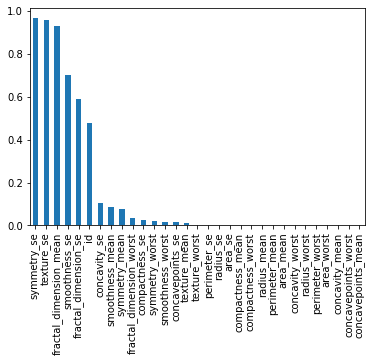

In [ ]:
p_values = pd.Series(chi_scores[1],index = features_wdbc_preproc.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [ ]:
features_wdbc_chi= features_wdbc_preproc[['symmetry_se','texture_se','fractal_dimension_mean','smoothness_se','fractal_dimension_se','concavity_se','smoothness_mean','symmetry_mean','fractal_dimension_worst','compactness_se','symmetry_worst','smoothness_worst','concavepoints_se','texture_mean','texture_worst','perimeter_se','radius_se','area_se','compactness_mean','compactness_worst']]
#features_wdbc_chi.head()

#'id','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concavepoints_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concavepoints_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst', concavepoints_worst','symmetry_worst','fractal_dimension_worst'
#0      1             2              3                 4            5                6                    7                     8              9              10                           11            12         13           14         15                 16             17              18             19                     20                  21               22         23            24            25                    26                28                           29            30                                     

**Chi-Square test: Wisconsin Breast Dataset WBC**

In [ ]:
from sklearn.feature_selection import chi2
chi_scores = chi2(features_wbc_preproc, label_wbc)
chi_scores

(array([1.26463944e-01, 9.22331285e+01, 2.26329289e+02, 2.08110411e+02,
        1.69914669e+02, 7.99979563e+01, 1.78586023e+02, 1.08285143e+02,
        1.96503663e+02, 6.93091968e+01]),
 array([7.22126891e-01, 7.70441782e-22, 3.76609262e-51, 3.54919041e-47,
        7.72331216e-39, 3.74797200e-19, 9.86632677e-41, 2.32762807e-25,
        1.21016297e-44, 8.41761631e-17]))

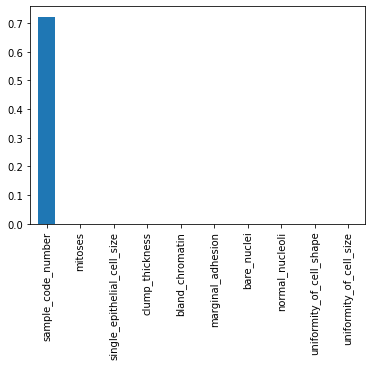

In [ ]:
p_values = pd.Series(chi_scores[1],index = features_wbc_preproc.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [ ]:
features_wbc_chi= features_wbc_preproc[['sample_code_number','mitoses','single_epithelial_cell_size','clump_thickness','bland_chromatin','marginal_adhesion','bare_nuclei']]
#features_wbc_chi.head()
#'sample_code_number','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses'
#  0                       1                   2                         3                         4                       5                             6                 7               8            9  

# **Distance Formulae**

In [ ]:
import math
#minkowski_distance
def p_root(value, root): 
      
    root_value = 1 / float(root) 
    return round (Decimal(value) **
             Decimal(root_value), 3) 
def minkowski_distance(x, y): 
    p_value=3 #root value
    # pass the p_root function to calculate 
    # all the value of vector parallely  
    return (p_root(sum(pow(abs(a-b), p_value) 
            for a, b in zip(x, y)), p_value))
    

def euclidean_Distance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def manhattan_distance(instance1, instance2, length):
    distance = 0
    for x in range(length):
         distance += abs(instance1[x]-instance2[x])
    return distance

def meanCharacterDifference(instance1, instance2, length):
    distance = 0
    for x in range(length):
         distance += abs(instance1[x]-instance2[x])
    return distance/length
def indexOfAssociation(instance1, instance2, length):
    distance = 0
    distance1 = 0
    distance2 = 0
    for x in range(length):
        for y in range(length):
            distance1 += (instance1[y])
            distance2 += (instance2[y])
        distance+=abs((instance1[x]/distance1)-(instance2[x]/distance2))
    return distance/length

def canberraMetic(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance+=abs(instance1[x]-instance2[x]) /(instance1[x]+instance2[x]) 
    return distance
def czekanowski(instance1, instance2, length):
    distance1 = 0
    distance2 = 0
    for x in range(length):
        distance1+=min(instance1[x],instance2[x])
    for x in range(length):
        distance2+=(instance1[x]+instance2[x]) 
    return 1-((2*distance1)/distance2)
              
def coefficientOfDivergence(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance+= pow((instance1[x]-instance2[x]) /(instance1[x]+instance2[x]),2)         
    return math.sqrt((distance)/length )   
              
def pearsonCoefficient(instance1, instance2, length):
    from statistics import mean 
    distance1 = 0
    distance2 = 0
    distance3 = 0
    instance1mean=mean(instance1)
    instance2mean=mean(instance2)
    for x in range(length):
        distance1+= (instance1[x]-instance1mean) *(instance2[x]-instance1mean)         
    for y in range(length):
        distance2+= pow((instance1[y]-instance1[y]),2)   
    for z in range(length):
        distance3+= pow((instance1[z]-instance1[z]),2)   
    return distance1/(math.sqrt(distance2)*math.sqrt(distance3))


def cosine_similarity(instance1,instance2):
    numerator = sum(a*b for a,b in zip(instance1,instance2))
    denominator = square_rooted(instance1)*square_rooted(instance2)
    return round(numerator/float(denominator),3)

def euclidean_Distance(x, y):
    return np.sqrt(np.sum((y-x)**2))

def cos_sim(a, b):
	"""Takes 2 vectors a, b and returns the cosine similarity according 
	to the definition of the dot product
	"""
	dot_product = np.dot(a, b)
	norm_a = np.linalg.norm(a)
	norm_b = np.linalg.norm(b)
	return dot_product / (norm_a * norm_b)
 
def Chebyshev (x, y):
  return np.max(y - x)

def manhattan_Distance(x, y):
    return np.sum((y-x))

# **KNN**

In [ ]:

def getKNeighborsByManhattan(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = manhattan_distance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
def getKNeighborsByEuclidean(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclidean_Distance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
def getKNeighborsByMeanCharacterDifference(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = meanCharacterDifference(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors 
def getKNeighborsByIndexOfAssociation(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = indexOfAssociation(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors 
def getKNeighborsByCanberraMetic(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = canberraMetic(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors 
def getKNeighborsByCzekanowski(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = czekanowski(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors 
def getKNeighborsByCoefficientOfDivergence(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = coefficientOfDivergence(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors 
def getKNeighborsByPearsonCoefficient(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = pearsonCoefficient(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors 

In [ ]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
 

In [ ]:
import csv
def handleDataset(filename, split, trainingSet=[] , testSet=[]):
    #with open(filename) as csvfile:
        #lines = csv.reader(filename)
        dataset = list(features_wbc_chi)
        print(dataset)
        for x in range((len(dataset))-1):
            for y in range(2):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split: trainingSet.append(dataset[x])
            else: testSet.append(dataset[x]) 

In [ ]:


def main():
   
    # prepare data 
    # features_wbc_chi
    # label_wdbc
    trainingSet=[] 
    testSet=[] 
    split = 0.77
 
    
    handleDataset(features_wbc_chi, split, trainingSet, testSet) 
    print('Train set: ' , repr(len(trainingSet)) )
    print( 'Test set: ' , repr(len(testSet)) )
    # generate predictions 
    predictions_manhattan=[] 
    predictions_euclidean=[]
    predictions_meanCharacterDifference=[]
    predictions_indexOfAssociation=[]
    predictions_canberraMetic=[]
    predictions_czekanowski=[]
    predictions_coefficientOfDivergence=[]
    predictions_pearsonCoefficient=[]
    
    k = 3
    for x in range(len(testSet)):
        
        neighbors_manhattan = getKNeighborsByManhattan(trainingSet, testSet[x], k) 
        neighbors_euclidean = getKNeighborsByEuclidean(trainingSet, testSet[x], k) 
        neighbors_meanCharacterDifference = getKNeighborsByMeanCharacterDifference(trainingSet, testSet[x], k) 
        neighbors_indexOfAssociation = getKNeighborsByIndexOfAssociation(trainingSet, testSet[x], k)
        neighbors_canberraMetic = getKNeighborsByCanberraMetic(trainingSet, testSet[x], k)
        neighbors_czekanowski = getKNeighborsByCzekanowski(trainingSet, testSet[x], k)
        neighbors_coefficientOfDivergence = getKNeighborsByCoefficientOfDivergence(trainingSet, testSet[x], k)
        #neighbors_pearsonCoefficient = getKNeighborsByPearsonCoefficient(trainingSet, testSet[x], k)
            
        result_manhattan = getResponse(neighbors_manhattan) 
        result_euclidean = getResponse(neighbors_euclidean ) 
        result_meanCharacterDifference = getResponse(neighbors_meanCharacterDifference ) 
        result_indexOfAssociation = getResponse(neighbors_indexOfAssociation) 
        result_canberraMetic = getResponse(neighbors_canberraMetic) 
        result_czekanowski = getResponse(neighbors_czekanowski) 
        result_coefficientOfDivergence = getResponse(neighbors_coefficientOfDivergence) 
        #result_pearsonCoefficient = getResponse(neighbors_pearsonCoefficient) 
        
        predictions_manhattan.append(result_manhattan) 
        predictions_euclidean.append(result_euclidean) 
        predictions_meanCharacterDifference.append(result_meanCharacterDifference) 
        predictions_indexOfAssociation.append(result_indexOfAssociation) 
        predictions_canberraMetic.append(result_canberraMetic) 
        predictions_czekanowski.append(result_czekanowski) 
        predictions_coefficientOfDivergence.append(result_coefficientOfDivergence) 
        #predictions_pearsonCoefficient.append(result_pearsonCoefficient) 
        #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
        
    accuracy_manhattan = getAccuracy(testSet, predictions_manhattan)
    accuracy_euclidean = getAccuracy(testSet, predictions_euclidean)
    accuracy_meanCharacterDifference = getAccuracy(testSet, predictions_meanCharacterDifference)
    accuracy_indexOfAssociation = getAccuracy(testSet, predictions_indexOfAssociation)
    accuracy_canberraMetic = getAccuracy(testSet, predictions_canberraMetic)
    accuracy_czekanowski = getAccuracy(testSet, predictions_czekanowski)
    accuracy_coefficientOfDivergence = getAccuracy(testSet, predictions_coefficientOfDivergence)
    #accuracy_pearsonCoefficient = getAccuracy(testSet, predictions_pearsonCoefficient)
        
    print('accuracy_manhattan: ' + repr(accuracy_manhattan) + '%')
    print('accuracy_euclidean: ' + repr(accuracy_euclidean) + '%')
    print('accuracy_meanCharacterDifference: ' + repr(accuracy_meanCharacterDifference) + '%')
    print('accuracy_indexOfAssociation: ' + repr(accuracy_indexOfAssociation) + '%')
    print('accuracy_canberraMetic: ' + repr(accuracy_canberraMetic) + '%')
    print('accuracy_czekanowski: ' + repr(accuracy_czekanowski) + '%')
    print('accuracy_coefficientOfDivergence: ' + repr(accuracy_coefficientOfDivergence) + '%')
    #print('accuracy_pearsonCoefficient: ' + repr(accuracy_pearsonCoefficient) + '%')
main()

['sample_code_number', 'mitoses', 'single_epithelial_cell_size', 'clump_thickness', 'bland_chromatin', 'marginal_adhesion', 'bare_nuclei', 'normal_nucleoli', 'uniformity_of_cell_shape', 'uniformity_of_cell_size']


ValueError: ignored

# **Sklearn KNN**

testing  result plotting

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 0.5], [0, 0.5], color='darkblue', linestyle='-')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
def plot_roc_curve2(x,y):
  
      
    # plotting the points  
    plt.plot(x, y, color='green', linestyle='dashed', linewidth = 5, 
            marker='o', markerfacecolor='blue', markersize=12) 
      
    # setting x and y axis range 
    plt.ylim(0,100) 
    plt.xlim(0,100) 
      
    # naming the x axis 
    plt.xlabel('x - axis') 
    # naming the y axis 
    plt.ylabel('y - axis') 
      
    # giving a title to my graph 
    plt.title('Some cool customizations!') 
      
# function to show the plot 
plt.show() 


# **WBC**


###################WOFS / WBC###################
Euclidean Accuracy= 0.9619047619047619
Recall 98.57142857142858
Fall out= 5.0
Specificity= 95.0
F1 Score= 94.52054794520548
error_rate= 3.8095238095238098
Miss_rate (FNR)= 1.4285714285714286
MCC= 91.79036620241072
Training time taken: 0.03898048400878906
Predicting time taken: 1.2701809406280518


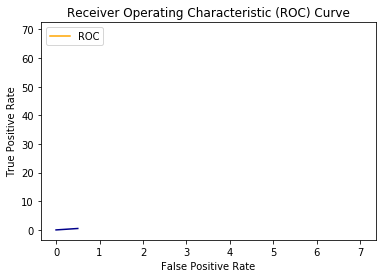

Manhattan Accuracy= 0.9571428571428572
Recall 95.71428571428572
Fall out= 4.285714285714286
Specificity= 95.71428571428572
F1 Score= 93.7062937062937
error_rate= 4.285714285714286
Miss_rate (FNR)= 4.285714285714286
MCC= 90.50514284786146
Training time taken: 0.02879500389099121
Predicting time taken: 0.6905076503753662


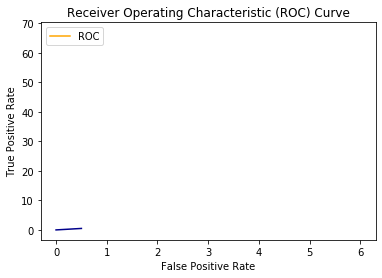

Chebyshev Accuracy= 0.9571428571428572
Recall 97.14285714285714
Fall out= 5.0
Specificity= 95.0
F1 Score= 93.79310344827586
error_rate= 4.285714285714286
Miss_rate (FNR)= 2.857142857142857
MCC= 90.65195959149355
Training time taken: 0.03585648536682129
Predicting time taken: 0.8516294956207275


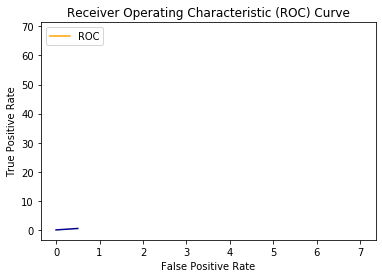

Minkowski Accuracy= 0.9619047619047619
Recall 98.57142857142858
Fall out= 5.0
Specificity= 95.0
F1 Score= 94.52054794520548
error_rate= 3.8095238095238098
Miss_rate (FNR)= 1.4285714285714286
MCC= 91.79036620241072
Training time taken: 0.04364371299743652
Predicting time taken: 1.2645325660705566


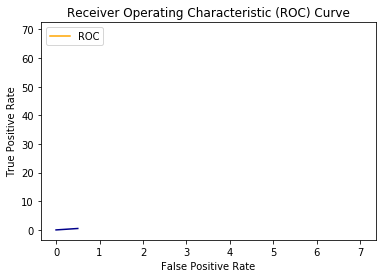

Cosine Accuracy= 0.9238095238095239
Recall 95.71428571428572
Fall out= 9.285714285714286
Specificity= 90.71428571428571
F1 Score= 89.33333333333333
error_rate= 7.6190476190476195
Miss_rate (FNR)= 4.285714285714286
MCC= 83.8984046790659
Training time taken: 0.0847477912902832
Predicting time taken: 2.659440517425537


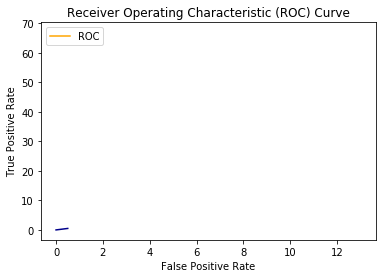

Correlation Accuracy= 0.9142857142857143
Recall 88.57142857142857
Fall out= 7.142857142857142
Specificity= 92.85714285714286
F1 Score= 87.32394366197182
error_rate= 8.571428571428571
Miss_rate (FNR)= 11.428571428571429
MCC= 80.86937042208112
Training time taken: 0.12842726707458496
Predicting time taken: 4.081941604614258


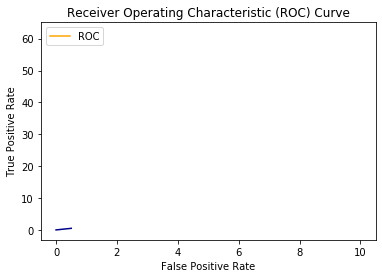

Hamming Accuracy= 0.9619047619047619
Recall 94.28571428571428
Fall out= 2.857142857142857
Specificity= 97.14285714285714
F1 Score= 94.28571428571428
error_rate= 3.8095238095238098
Miss_rate (FNR)= 5.714285714285714
MCC= 91.42857142857143
Training time taken: 0.042609453201293945
Predicting time taken: 1.600834608078003


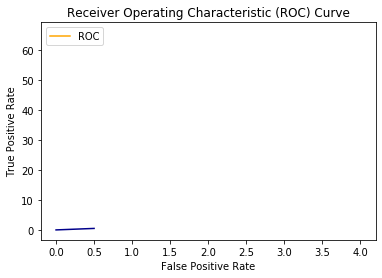

canberra Accuracy= 0.9714285714285714
Recall 100.0
Fall out= 4.285714285714286
Specificity= 95.71428571428572
F1 Score= 95.8904109589041
error_rate= 2.857142857142857
Miss_rate (FNR)= 0.0
MCC= 93.89243565742775
Training time taken: 0.0986325740814209
Predicting time taken: 2.405277729034424


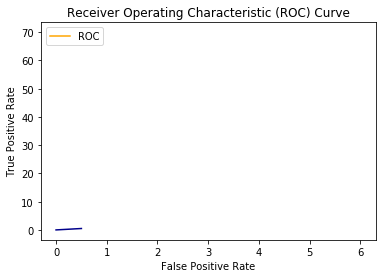

################### CHI2 / WBC ###################
Euclidean Accuracy= 0.9619047619047619
Recall 98.57142857142858
Fall out= 5.0
Specificity= 95.0
F1 Score= 94.52054794520548
error_rate= 3.8095238095238098
Miss_rate (FNR)= 1.4285714285714286
MCC= 91.79036620241072
Training time taken: 0.04684782028198242
Predicting time taken: 1.314237356185913


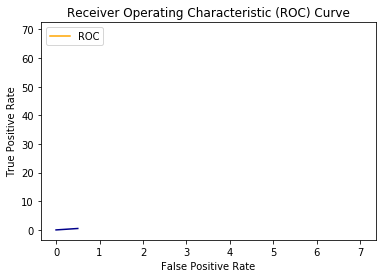

Manhattan Accuracy= 0.9666666666666667
Recall 97.14285714285714
Fall out= 3.571428571428571
Specificity= 96.42857142857143
F1 Score= 95.1048951048951
error_rate= 3.3333333333333335
Miss_rate (FNR)= 2.857142857142857
MCC= 92.62635713335821
Training time taken: 0.029677152633666992
Predicting time taken: 0.6918926239013672


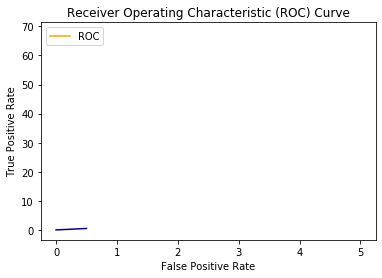

Chebyshev Accuracy= 0.9523809523809523
Recall 95.71428571428572
Fall out= 5.0
Specificity= 95.0
F1 Score= 93.05555555555556
error_rate= 4.761904761904762
Miss_rate (FNR)= 4.285714285714286
MCC= 89.5165650664929
Training time taken: 0.025895357131958008
Predicting time taken: 0.862008810043335


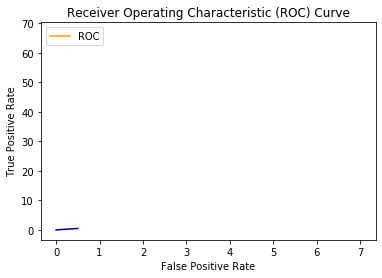

Minkowski Accuracy= 0.9619047619047619
Recall 98.57142857142858
Fall out= 5.0
Specificity= 95.0
F1 Score= 94.52054794520548
error_rate= 3.8095238095238098
Miss_rate (FNR)= 1.4285714285714286
MCC= 91.79036620241072
Training time taken: 0.04351973533630371
Predicting time taken: 1.313932180404663


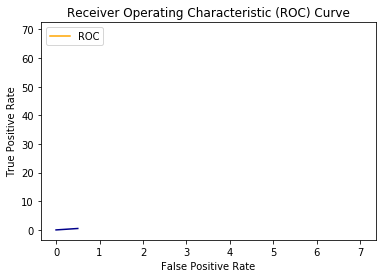

Cosine Accuracy= 0.9095238095238095
Recall 88.57142857142857
Fall out= 7.857142857142857
Specificity= 92.14285714285714
F1 Score= 86.7132867132867
error_rate= 9.047619047619047
Miss_rate (FNR)= 11.428571428571429
MCC= 79.8990714203777
Training time taken: 0.08652353286743164
Predicting time taken: 2.6414716243743896


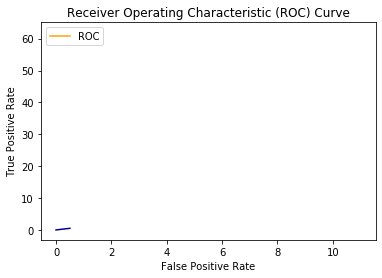

Correlation Accuracy= 0.9
Recall 88.57142857142857
Fall out= 9.285714285714286
Specificity= 90.71428571428571
F1 Score= 85.51724137931035
error_rate= 10.0
Miss_rate (FNR)= 11.428571428571429
MCC= 78.00284895082002
Training time taken: 0.13305902481079102
Predicting time taken: 4.307378530502319


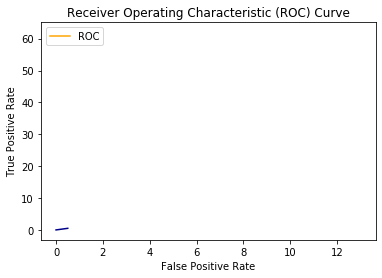

Hamming Accuracy= 0.9571428571428572
Recall 94.28571428571428
Fall out= 3.571428571428571
Specificity= 96.42857142857143
F1 Score= 93.61702127659575
error_rate= 4.285714285714286
Miss_rate (FNR)= 5.714285714285714
MCC= 90.3966109388337
Training time taken: 0.04332137107849121
Predicting time taken: 1.6462674140930176


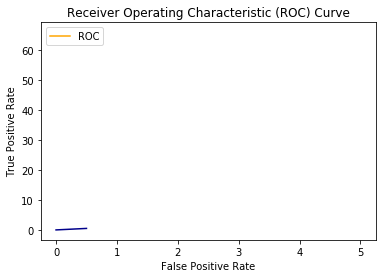

canberra Accuracy= 0.9761904761904762
Recall 100.0
Fall out= 3.571428571428571
Specificity= 96.42857142857143
F1 Score= 96.55172413793103
error_rate= 2.380952380952381
Miss_rate (FNR)= 0.0
MCC= 94.86832980505137
Training time taken: 0.07224750518798828
Predicting time taken: 2.206402063369751


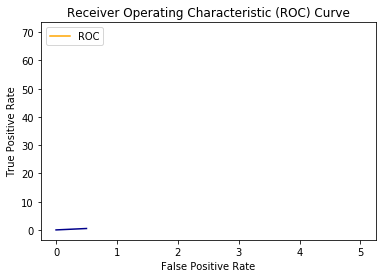

################### LSV / WBC ###################
Euclidean Accuracy= 0.9666666666666667
Recall 97.14285714285714
Fall out= 3.571428571428571
Specificity= 96.42857142857143
F1 Score= 95.1048951048951
error_rate= 3.3333333333333335
Miss_rate (FNR)= 2.857142857142857
MCC= 92.62635713335821
Training time taken: 0.05233573913574219
Predicting time taken: 1.336160659790039


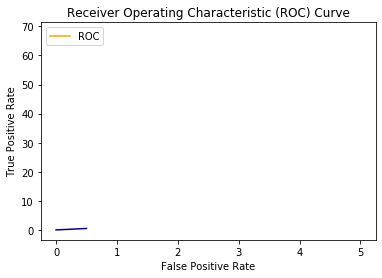

Manhattan Accuracy= 0.9666666666666667
Recall 97.14285714285714
Fall out= 3.571428571428571
Specificity= 96.42857142857143
F1 Score= 95.1048951048951
error_rate= 3.3333333333333335
Miss_rate (FNR)= 2.857142857142857
MCC= 92.62635713335821
Training time taken: 0.029589176177978516
Predicting time taken: 0.76157546043396


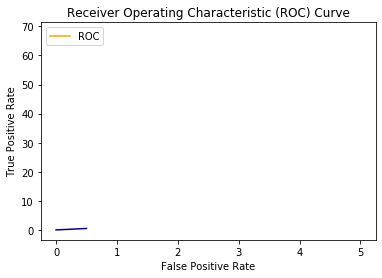

Chebyshev Accuracy= 0.9714285714285714
Recall 98.57142857142858
Fall out= 3.571428571428571
Specificity= 96.42857142857143
F1 Score= 95.83333333333334
error_rate= 2.857142857142857
Miss_rate (FNR)= 1.4285714285714286
MCC= 93.7456941247524
Training time taken: 0.024847984313964844
Predicting time taken: 0.8671438694000244


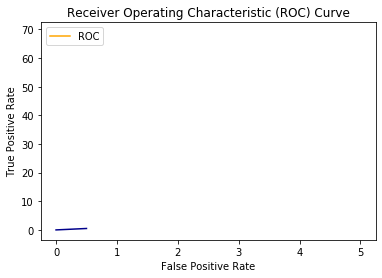

Minkowski Accuracy= 0.9666666666666667
Recall 97.14285714285714
Fall out= 3.571428571428571
Specificity= 96.42857142857143
F1 Score= 95.1048951048951
error_rate= 3.3333333333333335
Miss_rate (FNR)= 2.857142857142857
MCC= 92.62635713335821
Training time taken: 0.047637224197387695
Predicting time taken: 1.3301677703857422


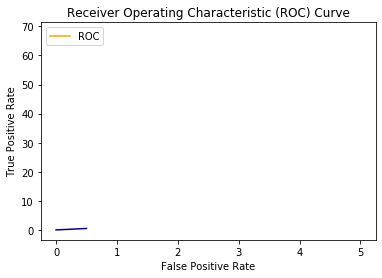

Cosine Accuracy= 0.9095238095238095
Recall 91.42857142857143
Fall out= 9.285714285714286
Specificity= 90.71428571428571
F1 Score= 87.07482993197279
error_rate= 9.047619047619047
Miss_rate (FNR)= 8.571428571428571
MCC= 80.3547694644566
Training time taken: 0.08557415008544922
Predicting time taken: 2.671459436416626


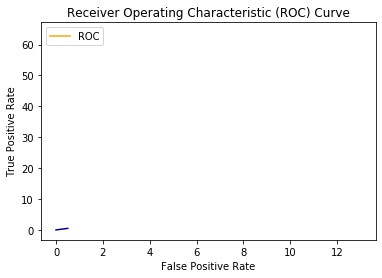

-----------------------------Correlation-----------------------------
 Accuracy= 0.9142857142857143
Recall 91.42857142857143
Fall out= 8.571428571428571
Specificity= 91.42857142857143
F1 Score= 87.67123287671232
error_rate= 8.571428571428571
Miss_rate (FNR)= 8.571428571428571
MCC= 81.28001892732553
Training time taken: 0.13397502899169922
Predicting time taken: 4.7845094203948975


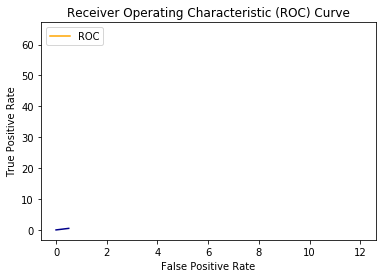

-----------------------------Hamming-----------------------------
 Accuracy= 0.9428571428571428
Recall 91.42857142857143
Fall out= 4.285714285714286
Specificity= 95.71428571428572
F1 Score= 91.42857142857143
error_rate= 5.714285714285714
Miss_rate (FNR)= 8.571428571428571
MCC= 87.14285714285714
Training time taken: 0.040183305740356445
Predicting time taken: 1.612964391708374


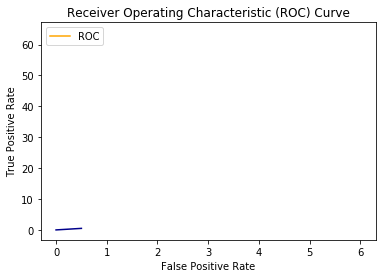

canberra Accuracy= 0.9761904761904762
Recall 100.0
Fall out= 3.571428571428571
Specificity= 96.42857142857143
F1 Score= 96.55172413793103
error_rate= 2.380952380952381
Miss_rate (FNR)= 0.0
MCC= 94.86832980505137
Training time taken: 0.07710528373718262
Predicting time taken: 2.413287401199341


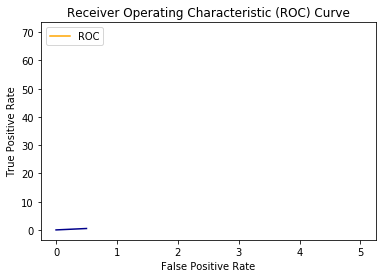

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
trainX, testX, trainy, testy = train_test_split(WOFS_features_wbc, label_wbc, test_size=0.3)
print('###################WOFS / WBC###################')
###################Euclidean Similarity###################

classifier = KNeighborsClassifier(metric= dist.euclidean, n_neighbors=1)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()

print('Euclidean Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(fp,tp)




###################Manhattan Similarity###################
classifier = KNeighborsClassifier(metric=  dist.cityblock, n_neighbors=3)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Manhattan Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(fp,tp)

###################Chebyshev Similarity###################
classifier = KNeighborsClassifier(metric= dist.chebyshev,n_neighbors=8)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Chebyshev Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(fp,tp)

###################Minkowski Similarity###################
classifier = KNeighborsClassifier(metric= dist.minkowski,n_neighbors=1)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Minkowski Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Cosine Similarity###################
classifier = KNeighborsClassifier(metric= dist.cosine,n_neighbors=5)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Cosine Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)


###################Correlation Similarity###################
classifier = KNeighborsClassifier(metric= dist.correlation,n_neighbors=1)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Correlation Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Hamming Similarity###################
classifier = KNeighborsClassifier(metric= dist.hamming,n_neighbors=7)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Hamming Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Canberra Similarity###################
classifier = KNeighborsClassifier(metric= dist.canberra,n_neighbors=9)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('canberra Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)
#print("precision is : " + str(1 - np.abs(res - label_wbc).sum()*1./(2*n)))






print('################### CHI2 / WBC ###################')

###################Euclidean Similarity###################
classifier = KNeighborsClassifier(metric= dist.euclidean,n_neighbors=3)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Euclidean Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)


###################Manhattan Similarity###################
classifier = KNeighborsClassifier(metric=  dist.cityblock,n_neighbors=1)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Manhattan Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Chebyshev Similarity###################
classifier = KNeighborsClassifier(metric= dist.chebyshev,n_neighbors=5)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Chebyshev Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Minkowski Similarity###################
classifier = KNeighborsClassifier(metric= dist.minkowski,n_neighbors=3)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Minkowski Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Cosine Similarity###################
classifier = KNeighborsClassifier(metric= dist.cosine,n_neighbors=4)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Cosine Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Correlation Similarity###################
classifier = KNeighborsClassifier(metric= dist.correlation,n_neighbors=5)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Correlation Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)
###################Hamming Similarity###################
classifier = KNeighborsClassifier(metric= dist.hamming,n_neighbors=3)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Hamming Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Canberra Similarity###################
classifier = KNeighborsClassifier(metric= dist.canberra,n_neighbors=1)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('canberra Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)
#print("precision is : " + str(1 - np.abs(res - label_wbc).sum()*1./(2*n)))






print('################### LSV / WBC ###################')

###################Euclidean Similarity###################
classifier = KNeighborsClassifier(metric= dist.euclidean,n_neighbors=5)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Euclidean Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Manhattan Similarity###################
classifier = KNeighborsClassifier(metric=  dist.cityblock,n_neighbors=10)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Manhattan Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Chebyshev Similarity###################
classifier = KNeighborsClassifier(metric= dist.chebyshev,n_neighbors=10)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Chebyshev Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Minkowski Similarity###################
classifier = KNeighborsClassifier(metric= dist.minkowski,n_neighbors=5)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Minkowski Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Cosine Similarity###################
classifier = KNeighborsClassifier(metric= dist.cosine,n_neighbors=6)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('Cosine Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Correlation Similarity###################
classifier = KNeighborsClassifier(metric= dist.correlation,n_neighbors=13)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('-----------------------------Correlation-----------------------------')
print(' Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Hamming Similarity###################
classifier = KNeighborsClassifier(metric= dist.hamming,n_neighbors=1)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('-----------------------------Hamming-----------------------------')
print(' Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)

###################Canberra Similarity###################
classifier = KNeighborsClassifier(metric= dist.canberra,n_neighbors=7)
t1 = time.time()
classifier.fit(trainX,trainy)
t2 = time.time()
t3 = time.time()
res = classifier.predict(testX)
t4 = time.time()
print('canberra Accuracy=',accuracy_score(testy, res))
tn, fp, fn, tp = confusion_matrix(testy, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))*100
mcc=sklearn.metrics.matthews_corrcoef(testy, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
plot_roc_curve(fp,tp)
#plot_roc_curve2(recall,specificity)
#print("precision is : " + str(1 - np.abs(res - label_wbc).sum()*1./(2*n)))


plot testing

Automatically created module for IPython interactive environment


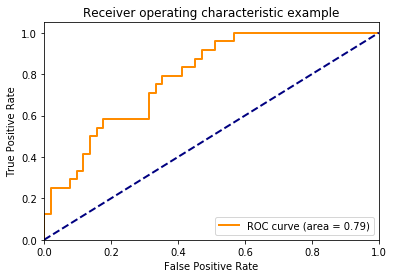

In [ ]:
###############33 Check    


print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(label_wbc, classes=[0, 1, 2,3,4])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = WOFS_features_wbc.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(WOFS_features_wdbc, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **WDBC**

In [ ]:
import sklearn
print('################### WOFS / WdBC###################')
###################Euclidean Similarity###################
classifier = KNeighborsClassifier(metric= dist.euclidean,n_neighbors=5)
t1 = time.time()
classifier.fit(WOFS_features_wdbc,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(WOFS_features_wdbc)
t4 = time.time()

print('Euclidean Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Manhattan Similarity###################
classifier = KNeighborsClassifier(metric=  dist.cityblock,n_neighbors=6)
t1 = time.time()
classifier.fit(WOFS_features_wdbc,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(WOFS_features_wdbc)
t4 = time.time()
print('Manhattan Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))


###################Chebyshev Similarity###################
classifier = KNeighborsClassifier(metric= dist.chebyshev,n_neighbors=5)
t1 = time.time()
classifier.fit(WOFS_features_wdbc,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(WOFS_features_wdbc)
t4 = time.time()
print('Chebyshev Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))


###################Minkowski Similarity###################
classifier = KNeighborsClassifier(metric= dist.minkowski,n_neighbors=5)
t1 = time.time()
classifier.fit(WOFS_features_wdbc,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(WOFS_features_wdbc)
t4 = time.time()
print('Minkowski Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Cosine Similarity###################
classifier = KNeighborsClassifier(metric= dist.cosine,n_neighbors=17)
t1 = time.time()
classifier.fit(WOFS_features_wdbc,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(WOFS_features_wdbc)
t4 = time.time()
print('Cosine Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Correlation Similarity###################
classifier = KNeighborsClassifier(metric= dist.correlation,n_neighbors=8)
t1 = time.time()
classifier.fit(WOFS_features_wdbc,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(WOFS_features_wdbc)
t4 = time.time()
print('Correlation Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Hamming Similarity###################
classifier = KNeighborsClassifier(metric= dist.hamming,n_neighbors=1)
t1 = time.time()
classifier.fit(WOFS_features_wdbc,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(WOFS_features_wdbc)
t4 = time.time()
print('Hamming Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Canberra Similarity###################
classifier = KNeighborsClassifier(metric= dist.canberra,n_neighbors=3)
t1 = time.time()
classifier.fit(WOFS_features_wdbc,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(WOFS_features_wdbc)
t4 = time.time()
print('canberra Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
#print("precision is : " + str(1 - np.abs(res - label_wbc).sum()*1./(2*n)))








print('################### CHI2 / WDBC###################')
###################Euclidean Similarity###################
classifier = KNeighborsClassifier(metric= dist.euclidean,n_neighbors=9)
t1 = time.time()
classifier.fit(features_wdbc_chi,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_chi)
t4 = time.time()
print('Euclidean Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Manhattan Similarity###################
classifier = KNeighborsClassifier(metric=  dist.cityblock,n_neighbors=7)
t1 = time.time()
classifier.fit(features_wdbc_chi,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_chi)
t4 = time.time()
print('Manhattan Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Chebyshev Similarity###################
classifier = KNeighborsClassifier(metric= dist.chebyshev,n_neighbors=13)
t1 = time.time()
classifier.fit(features_wdbc_chi,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_chi)
t4 = time.time()
print('Chebyshev Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))


###################Minkowski Similarity###################
classifier = KNeighborsClassifier(metric= dist.minkowski,n_neighbors=9)
t1 = time.time()
classifier.fit(features_wdbc_chi,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_chi)
t4 = time.time()
print('Minkowski Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Cosine Similarity###################
classifier = KNeighborsClassifier(metric= dist.cosine,n_neighbors=9)
t1 = time.time()
classifier.fit(features_wdbc_chi,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_chi)
t4 = time.time()
print('Cosine Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Correlation Similarity###################
classifier = KNeighborsClassifier(metric= dist.correlation,n_neighbors=2)
t1 = time.time()
classifier.fit(features_wdbc_chi,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_chi)
t4 = time.time()
print('Correlation Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
###################Hamming Similarity###################
classifier = KNeighborsClassifier(metric= dist.hamming,n_neighbors=3)
t1 = time.time()
classifier.fit(features_wdbc_chi,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_chi)
t4 = time.time()
print('Hamming Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Canberra Similarity###################
classifier = KNeighborsClassifier(metric= dist.canberra,n_neighbors=8)
t1 = time.time()
classifier.fit(features_wdbc_chi,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_chi)
t4 = time.time()
print('canberra Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
#print("precision is : " + str(1 - np.abs(res - label_wbc).sum()*1./(2*n)))






print('################### LSV / WDBC###################')
###################Euclidean Similarity###################
classifier = KNeighborsClassifier(metric= dist.euclidean,n_neighbors=8)
t1 = time.time()
classifier.fit(features_wdbc_LSV,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_LSV)
t4 = time.time()
print('Euclidean Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Manhattan Similarity###################
classifier = KNeighborsClassifier(metric=  dist.cityblock,n_neighbors=6)
t1 = time.time()
classifier.fit(features_wdbc_LSV,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_LSV)
t4 = time.time()
print('Manhattan Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Chebyshev Similarity###################
classifier = KNeighborsClassifier(metric= dist.chebyshev,n_neighbors=9)
t1 = time.time()
classifier.fit(features_wdbc_LSV,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_LSV)
t4 = time.time()
print('Chebyshev Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Minkowski Similarity###################
classifier = KNeighborsClassifier(metric= dist.minkowski,n_neighbors=8)
t1 = time.time()
classifier.fit(features_wdbc_LSV,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_LSV)
t4 = time.time()
print('Minkowski Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))


###################Cosine Similarity###################
classifier = KNeighborsClassifier(metric= dist.cosine,n_neighbors=1)
t1 = time.time()
classifier.fit(features_wdbc_LSV,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_LSV)
t4 = time.time()
print('Cosine Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Correlation Similarity###################
classifier = KNeighborsClassifier(metric= dist.correlation,n_neighbors=1)
t1 = time.time()
classifier.fit(features_wdbc_LSV,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_LSV)
t4 = time.time()
print('Correlation Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Hamming Similarity###################
classifier = KNeighborsClassifier(metric= dist.hamming,n_neighbors=2)
t1 = time.time()
classifier.fit(features_wdbc_LSV,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_LSV)
t4 = time.time()
print('Hamming Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))

###################Canberra Similarity###################
classifier = KNeighborsClassifier(metric= dist.canberra,n_neighbors=22)
t1 = time.time()
classifier.fit(features_wdbc_LSV,label_wdbc)
t2 = time.time()
t3 = time.time()
res = classifier.predict(features_wdbc_LSV)
t4 = time.time()
print('canberra Accuracy=',accuracy_score(label_wdbc, res))
tn, fp, fn, tp = confusion_matrix(label_wdbc, res).ravel()
recall=(tp/(tp+fn))*100
f1score=((2*tp)/(2*tp+fp+fn))*100
print('Recall',recall)
specificity = (tn / (tn+fp))*100
fall_out=fp/(fp+tn)*100
fnr=(fn/(fn+tp))*100
error_rate=((fp+fn)/(tp+tn+fp+fn))/100
mcc=sklearn.metrics.matthews_corrcoef(label_wdbc, res)*100
print('Fall out=', fall_out)
print('Specificity=',specificity)
print('F1 Score=', f1score)
print('error_rate=',error_rate)
print('Miss_rate (FNR)=',fnr)
print('MCC=',mcc)
print('Training time taken:',(t2 - t1))
print('Predicting time taken:',(t4 - t3))
#print("precision is : " + str(1 - np.abs(res - label_wbc).sum()*1./(2*n)))


################### WOFS / WdBC###################
Euclidean Accuracy= 0.9789103690685413
Recall 94.81132075471697
Fall out= 0.2801120448179272
Specificity= 99.71988795518207
F1 Score= 97.10144927536231
error_rate= 0.00021089630931458699
Miss_rate (FNR)= 5.188679245283019
MCC= 95.51432978884041
Training time taken: 0.04857063293457031
Predicting time taken: 5.15067982673645
Manhattan Accuracy= 0.9736379613356766
Recall 93.86792452830188
Fall out= 0.5602240896358543
Specificity= 99.43977591036415
F1 Score= 96.3680387409201
error_rate= 0.00026362038664323376
Miss_rate (FNR)= 6.132075471698113
MCC= 94.38382788858542
Training time taken: 0.027192354202270508
Predicting time taken: 2.9978439807891846
Chebyshev Accuracy= 0.9648506151142355
Recall 93.39622641509435
Fall out= 1.680672268907563
Specificity= 98.31932773109243
F1 Score= 95.1923076923077
error_rate= 0.000351493848857645
Miss_rate (FNR)= 6.60377358490566
MCC= 92.46630790531701
Training time taken: 0.03170347213745117
Predicting tim

In [ ]:
def plot_ROC(test_labels, test_predictions):
    fpr, tpr, thresholds = metrics.roc_curve(
        test_labels, test_predictions, pos_label=1)
    auc = "%.2f" % metrics.auc(fpr, tpr)
    title = 'ROC Curve, AUC = '+str(auc)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, "#000099", label='ROC curve')
        ax.plot([0, 1], [0, 1], 'k--', label='Baseline')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.title(title)
    return fig 
plot_ROC(label_wdbc, res)

TypeError: ignored

In [ ]:
from sklearn import metrics
#fpr, tpr, thresholds = metrics.roc_curve(label_wdbc, res, pos_label=2)
n_groups = 5
#means_frank = (90, 55, 40, 65)
#means_guido = (85, 62, 54, 20)
a=  (0.8553281580804517, ma1, rms1, 0.15372549019600462, 0.5544826240669376) 
b =  (0.9411764705882353, ma2, rms2, 0.08101851851843646, 0.4025382429497066)
c = (0.9448183041722745, ma3, rms3, 0.08101851851843646, 0.4025382429497066)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.9

rects1 = plt.bar(index, a, bar_width,
alpha=opacity,
color='b',
label='DT')

rects2 = plt.bar(index + bar_width, b, bar_width,
alpha=opacity,
color='g',
label='KNN')

rects3 = plt.bar(index + bar_width+bar_width, c, bar_width,
alpha=opacity,
color='r',
label='SVM')

plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.xticks(index + bar_width, ('Kapa', 'MAE', 'RMSE', 'RAE', 'RRSE'))
plt.legend()

plt.tight_layout()
plt.show()

TypeError: ignored